## Download Historical Data About Various Coins

In [1]:
import yfinance as yf

yf_data = yf.download(['ADA-USD', 'BNB-USD', 'BTC-USD', 'ETH-USD','XRP-USD','DOT-USD','MATIC-USD','SOL-USD'],
                      start='2016-01-01')
yf_data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[*********************100%***********************]  8 of 8 completed


Price      Adj Close                                                   \
Ticker       ADA-USD     BNB-USD       BTC-USD   DOT-USD      ETH-USD   
Date                                                                    
2016-01-01       NaN         NaN    434.334015       NaN          NaN   
2016-01-02       NaN         NaN    433.437988       NaN          NaN   
2016-01-03       NaN         NaN    430.010986       NaN          NaN   
2016-01-04       NaN         NaN    433.091003       NaN          NaN   
2016-01-05       NaN         NaN    431.959991       NaN          NaN   
...              ...         ...           ...       ...          ...   
2025-01-07  0.992010  697.368896  96922.703125  7.015230  3381.577393   
2025-01-08  0.948031  695.837158  95043.523438  6.761236  3326.329346   
2025-01-09  0.905990  685.120728  92484.039062  6.557372  3219.430664   
2025-01-10  0.931453  693.624451  94701.453125  6.736067  3267.489990   
2025-01-11  0.934222  695.252563  94337.640625  6.629536  3262.560547   

Price                                          Close              ...  \
Ticker     MATIC-USD     SOL-USD   XRP-USD   ADA-USD     BNB-USD  ...   
Date                                                              ...   
2016-01-01       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-02       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-03       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-04       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-05       NaN         NaN       NaN       NaN         NaN  ...   
...              ...         ...       ...       ...         ...  ...   
2025-01-07  0.470071  202.230255  2.272350  0.992010  697.368896  ...   
2025-01-08  0.462149  197.559052  2.375305  0.948031  695.837158  ...   
2025-01-09  0.449210  185.025284  2.275212  0.905990  685.120728  ...   
2025-01-10  0.457898  187.579178  2.343252  0.931453  693.624451  ...   
2025-01-11  0.453839  186.172684  2.388132  0.934222  695.252563  ...   

Price             Open                  Volume                             \
Ticker         SOL-USD   XRP-USD       ADA-USD       BNB-USD      BTC-USD   
Date                                                                        
2016-01-01         NaN       NaN           NaN           NaN     36278900   
2016-01-02         NaN       NaN           NaN           NaN     30096600   
2016-01-03         NaN       NaN           NaN           NaN     39633800   
2016-01-04         NaN       NaN           NaN           NaN     38477500   
2016-01-05         NaN       NaN           NaN           NaN     34522600   
...                ...       ...           ...           ...          ...   
2025-01-07  218.412933  2.418794  2.238100e+09  2.200353e+09  58685738547   
2025-01-08  202.227875  2.272360  1.978553e+09  2.189465e+09  63875859171   
2025-01-09  197.559052  2.375308  1.351716e+09  1.931493e+09  62777261693   
2025-01-10  185.013138  2.275167  1.252359e+09  1.680784e+09  62058693684   
2025-01-11  187.575470  2.343032  7.725853e+08  1.478625e+09  43432828928   

Price                                                                          
Ticker          DOT-USD       ETH-USD   MATIC-USD       SOL-USD       XRP-USD  
Date                                                                           
2016-01-01          NaN           NaN         NaN           NaN           NaN  
2016-01-02          NaN           NaN         NaN           NaN           NaN  
2016-01-03          NaN           NaN         NaN           NaN           NaN  
2016-01-04          NaN           NaN         NaN           NaN           NaN  
2016-01-05          NaN           NaN         NaN           NaN           NaN  
...                 ...           ...         ...           ...           ...  
2025-01-07  512248161.0  3.223531e+10   5624802.0  4.360984e+09  7.375577e+09  
2025-01-08  488975074.0  3.433773e+10   6320648.0  5.028292e+09  8.537148e+

In [2]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT','MATICUSDT','SOLUSDT']

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in univ:
        px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
        print(f"Downloaded data for {coin}.")
    
    return px_data

In [3]:
px_data = get_price_data_for_universe('4h', '2020-01-01')
px_data['BTCUSDT']

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for ADAUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XRPUSDT.
Downloaded data for DOTUSDT.
Downloaded data for MATICUSDT.
Downloaded data for SOLUSDT.


,open,high,low,close,volume,close_time,quote_volume,num_trades,taker_base_volume,taker_quote_volume,ignore
open_time,,,,,,,,,,,
2020-01-01 00:00:00,7180.46000000,7238.03000000,7175.62000000,7230.71000000,12.76044500,2020-01-01 03:59:59.999,92038.71492464,136,6.77459900,48856.54532507,0
2020-01-01 04:00:00,7226.19000000,7231.70000000,7196.20000000,7205.50000000,1.11132000,2020-01-01 07:59:59.999,8019.12142380,64,0.51825300,3740.42331552,0
2020-01-01 08:00:00,7209.50000000,7231.17000000,7181.17000000,7195.80000000,2.09735800,2020-01-01 11:59:59.999,15104.19833234,61,1.10531000,7957.89489576,0
2020-01-01 12:00:00,7193.32000000,7244.43000000,7193.32000000,7233.02000000,7.53150600,2020-01-01 15:59:59.999,54379.11998954,111,4.23535400,30569.13569131,0
2020-01-01 16:00:00,7237.54000000,7245.54000000,7215.51000000,7223.72000000,5.49440100,2020-01-01 19:59:59.999,39733.51835241,80,2.65822100,19232.35402975,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,95331.09000000,95383.85000000,94582.26000000,94711.18000000,2.78848000,2025-01-10 23:59:59.999,264276.26474770,301,2.14169000,202893.83939650,0
2025-01-11 00:00:00,94819.09000000,94819.09000000,94147.99000000,94284.79000000,0.50635000,2025-01-11 03:59:59.999,47731.33150480,178,0.31016000,29234.21518750,0
2025-01-11 04:00:00,94282.96000000,94439.21000000,93914.47000000,94277.96000000,0.24219000,2025-01-11 07:59:59.999,22819.14630550,162,0.12631000,11911.18650750,0


In [4]:
px = {}

for coin in px_data:
    px[coin] = px_data[coin]["close"]

px_df = pd.DataFrame(px).astype(float)
px_df = px_df.reindex(pd.date_range(px_df.index[0],px_df.index[-1],freq='4h'))
px_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,7230.71,130.18,0.03308,13.8159,0.19406,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.03320,13.7648,0.19518,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.03321,13.7162,0.19358,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.03357,13.7958,0.19428,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.03361,13.7270,0.19474,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,94711.18,3269.76,0.93070,693.4000,2.34300,6.755,NaN,187.68
2025-01-11 00:00:00,94284.79,3241.51,0.91850,691.2500,2.33270,6.651,NaN,186.43
2025-01-11 04:00:00,94277.96,3234.33,0.91700,689.8800,2.34210,6.633,NaN,186.28
2025-01-11 08:00:00,94669.46,3277.22,0.94980,695.7500,2.42890,6.717,NaN,186.53


In [5]:
volume_dict = dict()

for coin in px_data:
    volume_dict[coin] = px_data[coin]["volume"]

volume_df = pd.DataFrame(volume_dict).astype(float)
volume_df = volume_df.reindex(pd.date_range(volume_df.index[0], volume_df.index[-1], freq='4h'))
volume_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,12.760445,116.96768,102547.5,178.050,413589.5,NaN,NaN,NaN
2020-01-01 04:00:00,1.111320,30.72021,123837.9,142.290,20155.3,NaN,NaN,NaN
2020-01-01 08:00:00,2.097358,67.41356,16867.6,452.150,29685.1,NaN,NaN,NaN
2020-01-01 12:00:00,7.531506,104.17904,24119.6,146.060,2491.5,NaN,NaN,NaN
2020-01-01 16:00:00,5.494401,24.96585,25282.5,188.870,24935.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,2.788480,11.36180,60343.9,24.472,66903.0,1235.25,NaN,412.033
2025-01-11 00:00:00,0.506350,11.09920,45629.5,39.222,41451.0,228.21,NaN,353.179
2025-01-11 04:00:00,0.242190,5.33150,10494.5,20.594,23563.0,374.15,NaN,303.564
2025-01-11 08:00:00,0.137290,4.25270,38262.6,19.561,52866.0,105.91,NaN,128.244


In [6]:
ret = px_df / px_df.shift() - 1
ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.003487,0.002612,0.003628,-0.003699,0.005771,NaN,NaN,NaN
2020-01-01 08:00:00,-0.001346,0.002452,0.000301,-0.003531,-0.008198,NaN,NaN,NaN
2020-01-01 12:00:00,0.005172,0.007643,0.010840,0.005803,0.003616,NaN,NaN,NaN
2020-01-01 16:00:00,-0.001286,0.001062,0.001192,-0.004987,0.002368,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-0.006385,-0.007768,-0.012834,0.000996,-0.006151,0.000741,NaN,-0.014182
2025-01-11 00:00:00,-0.004502,-0.008640,-0.013108,-0.003101,-0.004396,-0.015396,NaN,-0.006660
2025-01-11 04:00:00,-0.000072,-0.002215,-0.001633,-0.001982,0.004030,-0.002706,NaN,-0.000805
2025-01-11 08:00:00,0.004153,0.013261,0.035769,0.008509,0.037061,0.012664,NaN,0.001342


### Convenience Functions

In [7]:
# Calculate net returns when taking into account transaction costs. We assume transaction costs of 20 bps per
# share of turnover representing the sum of commissions to brokers and slippage paid to market makers. We
# ignore the fixed cost of the bid-ask spread also normally paid to market makers (assuming this is only about
# 1 bp in general).

def get_net_return(strat_holdings, ret):
    # assume that strat_holdings have already been shifted back in time to avoid look-ahead bias.
    gross_ret = (strat_holdings * ret).sum(axis=1)
    
    turnover = (strat_holdings.fillna(0) - strat_holdings.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

## Strategy 1: Testing Different Time Horizons For Momentum And Reversal -- All Coins

In [8]:
# Look at a rolling window of the immediately preceding average return for
# different granularities and trade based on the 
# ranked-demeaned-normalized values. Viewing this as a momentum strategy, 
# we long the coins in the top 50% and short the coins in the bottom 50%
# over the window. (All coins are included.)

In [9]:
def get_strat_1_holdings():
    strat_1_holdings = dict()

    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        period_mean_returns = ret.rolling(window=t, min_periods=1).mean()

        ranked_ret = period_mean_returns.rank(axis=1)
        ranked_demeaned_ret = ranked_ret.subtract(ranked_ret.mean(axis=1), axis=0)
        ranked_demeaned_normalized_ret = ranked_demeaned_ret.divide(ranked_demeaned_ret.abs().sum(axis=1), axis=0)
        
        # shift the holdings to use information from the previous days to avoid look-ahead bias
        strat_1_holdings[t] = ranked_demeaned_normalized_ret.shift()
    
    return strat_1_holdings

In [10]:
strat_1_holdings = get_strat_1_holdings()
strat_1_holdings[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,0.156250,-0.031250,0.218750,-0.156250,0.093750,0.031250,-0.21875,-0.093750
2025-01-11 00:00:00,0.031250,-0.093750,0.093750,-0.031250,0.156250,0.218750,-0.21875,-0.156250
2025-01-11 04:00:00,0.166667,-0.166667,-0.083333,0.083333,0.250000,0.000000,NaN,-0.250000
2025-01-11 08:00:00,0.166667,0.000000,-0.250000,0.083333,0.250000,-0.083333,NaN,-0.166667


In [11]:
def get_strat_1_gross_returns(strat_1_holdings, ret):
    strat_1_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_ret[t] = (strat_1_holdings[t] * ret).sum(axis=1)
    
    return pd.DataFrame(strat_1_ret)


strat_1_gross_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-1.517857,1.293179,1.091977,-0.066369,-1.214745,-1.073777,-0.191309,0.821708,0.126996
2025-01-11 00:00:00,0.314732,-0.387851,0.389435,1.094777,-0.247020,-1.269040,-0.984051,0.223574,0.370672
2025-01-11 04:00:00,0.475760,0.327424,0.647832,0.568356,0.583301,0.560856,0.146870,0.388117,0.332508
2025-01-11 08:00:00,1.454137,0.158346,-0.591638,-0.255339,0.144321,0.162477,3.409869,0.055756,1.249095


In [12]:
def get_strat_1_net_returns(strat_1_holdings, ret):
    #get_net_return(strat_holdings, ret)
    strat_1_net_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_net_ret[t] = get_net_return(strat_1_holdings[t], ret)
    
    return pd.DataFrame(strat_1_net_ret)

strat_1_gross_daily_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_daily_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-1.517857,1.293179,1.091977,-0.066369,-1.214745,-1.073777,-0.191309,0.821708,0.126996
2025-01-11 00:00:00,0.314732,-0.387851,0.389435,1.094777,-0.247020,-1.269040,-0.984051,0.223574,0.370672
2025-01-11 04:00:00,0.475760,0.327424,0.647832,0.568356,0.583301,0.560856,0.146870,0.388117,0.332508
2025-01-11 08:00:00,1.454137,0.158346,-0.591638,-0.255339,0.144321,0.162477,3.409869,0.055756,1.249095


In [13]:
import numpy as np

def get_strat_1_sr(strat_1_daily_ret):
    return strat_1_daily_ret.mean() / strat_1_daily_ret.std() * np.sqrt(365 * 24 / 4)

strat_1_gross_sr = get_strat_1_sr(strat_1_gross_daily_ret)
strat_1_gross_sr

1    -2.651607
2    -0.717723
3     0.095144
4     0.865092
5     1.219300
6     0.606720
12    1.408130
18    1.549683
24    1.406755
dtype: float64

<Axes: title={'center': 'Sharpe Ratio Over Different Horizons Without Transaction Costs'}, xlabel='Number of look-back periods in increments of 4 hours', ylabel='Sharpe Ratio'>

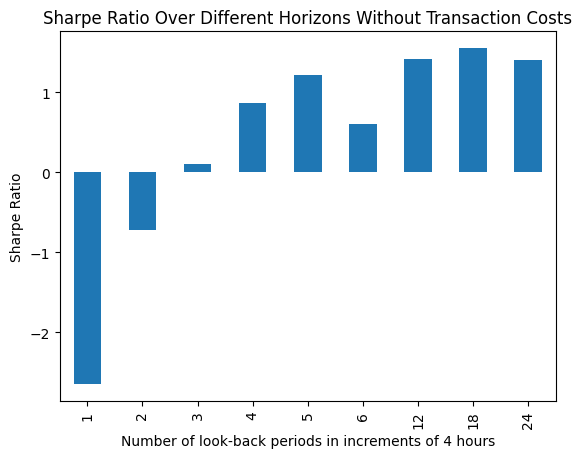

In [14]:
strat_1_gross_sr.plot(kind="bar", title="Sharpe Ratio Over Different Horizons Without Transaction Costs",
                xlabel="Number of look-back periods in increments of 4 hours",
                ylabel="Sharpe Ratio")

As we saw in the lectures, when we ignore transaction costs, we observe reversal at lower granularities (4 hours and 8 hours) but momentum at higher granularities (12 hours and higher).

In [15]:
def get_strat_1_annual_sr(strat_1_ret):
    yearly_resample = strat_1_ret.resample('YE')
    return yearly_resample.mean() / yearly_resample.std() * np.sqrt(365 * 24 / 4)

strat_1_gross_annual_sr = get_strat_1_annual_sr(strat_1_gross_daily_ret)
strat_1_gross_annual_sr

,1,2,3,4,5,6,12,18,24
2020-12-31,-3.848973,-3.929144,-1.972403,-0.150801,0.931690,-0.934529,1.385555,1.262651,1.618204
2021-12-31,-1.619153,2.232237,2.724654,2.696765,2.947196,2.088487,2.158285,2.787853,2.450617
2022-12-31,-4.248749,-2.326282,-1.958102,-0.670873,-0.582913,-0.932779,0.343887,0.992499,0.547970
2023-12-31,-1.446593,-0.012718,-0.153086,0.246768,0.935695,1.083398,1.884401,1.142865,0.721788
2024-12-31,-3.195714,-1.540009,-0.043546,0.848687,0.595175,1.149194,1.076726,0.848918,0.962606
2025-12-31,-3.181994,1.747414,-2.241827,4.362237,-0.218026,2.037072,3.123664,4.830113,0.441086


<Axes: title={'center': 'Sharpe Ratio Over Different Time Horizons Grouped By Year'}, xlabel='Year, number of lookback periods in increments of 4 hours', ylabel='Sharpe Ratio'>

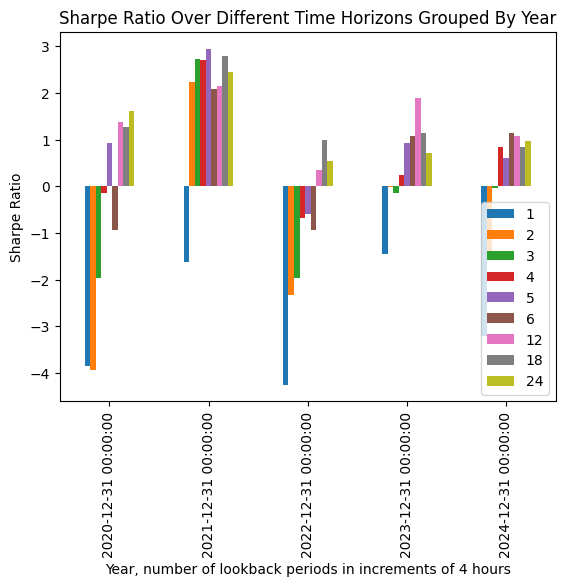

In [16]:
# Omit data from 2025 so far since it is likely too volatile to be useful over less than five days
strat_1_gross_annual_sr.iloc[:-1].plot(kind='bar',
                                       title="Sharpe Ratio Over Different Time Horizons Grouped By Year",
                                       xlabel="Year, number of lookback periods in increments of 4 hours",
                                       ylabel="Sharpe Ratio")

The strategy using a window of t=18 (3 days) seems to have a decent sharpe ratio overall (1.54) prior to
transaction costs.

### Strategy 1 With Transaction Costs

In [17]:
strat_1_net_daily_ret = get_strat_1_net_returns(strat_1_holdings, ret)
strat_1_net_daily_ret

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281
2020-01-01 12:00:00,-0.000485,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224
2020-01-01 16:00:00,-0.001334,-0.001384,0.001784,0.001784,0.001784,0.001784,0.001784,0.001784,0.001784
...,...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-0.007492,0.001876,-0.000008,-0.002890,-0.005578,-0.004192,-0.002524,0.001501,-0.000652
2025-01-11 00:00:00,-0.002471,-0.001729,0.000067,0.001333,-0.002760,-0.004977,-0.004196,0.000363,0.000766
2025-01-11 04:00:00,-0.000363,-0.001103,0.000108,0.001557,-0.000402,-0.000713,-0.000848,0.000563,0.000911
2025-01-11 08:00:00,0.002317,-0.001233,-0.003621,-0.002033,0.000062,-0.000555,0.008092,-0.000347,0.003172


In [18]:
strat_1_net_sr = get_strat_1_sr(strat_1_net_daily_ret)
strat_1_net_sr

1    -20.738304
2    -13.356890
3    -10.418657
4     -8.121859
5     -6.975648
6     -6.903703
12    -3.976467
18    -2.869127
24    -2.369218
dtype: float64

<Axes: title={'center': 'Sharpe Ratio For Strategy 1 Over Different Time Horizons'}>

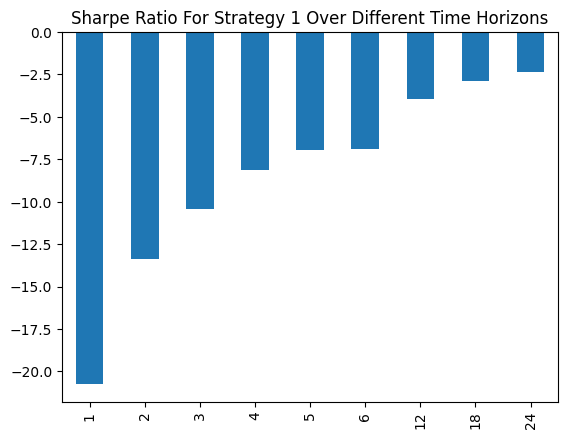

In [19]:
strat_1_net_sr.plot(kind='bar', title='Sharpe Ratio For Strategy 1 Over Different Time Horizons')

In [20]:
strat_1_annual_net_sr = get_strat_1_annual_sr(strat_1_net_daily_ret)
strat_1_annual_net_sr

,1,2,3,4,5,6,12,18,24
2020-12-31,-21.031334,-15.876341,-12.148299,-8.827155,-7.039332,-8.455215,-3.844958,-2.983348,-1.937347
2021-12-31,-13.451890,-5.703690,-3.803441,-2.787537,-2.003517,-2.446949,-1.125253,0.094664,0.260063
2022-12-31,-27.725324,-19.434049,-16.117718,-12.932315,-11.718566,-10.854681,-6.747374,-4.759926,-4.681088
2023-12-31,-28.993467,-20.106422,-17.059185,-14.046659,-11.807085,-10.529522,-6.491970,-5.637473,-5.274245
2024-12-31,-26.597023,-18.965743,-14.252453,-11.360359,-10.804976,-9.221851,-6.346870,-5.174634,-4.317617
2025-12-31,-26.305248,-15.677241,-17.193823,-8.669942,-11.675966,-8.068464,-4.960742,-1.060362,-5.185870


<Axes: title={'center': 'Strat 1: Net Sharpe Ratios Over Different Time Horizons Grouped By Year'}>

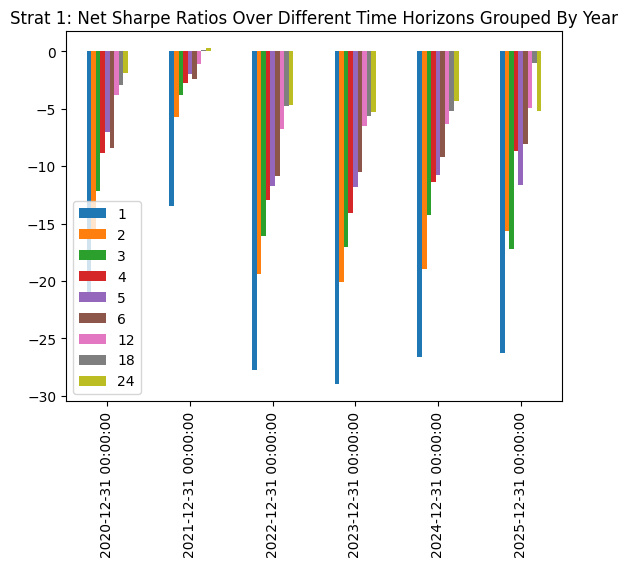

In [21]:
strat_1_annual_net_sr.plot(kind='bar',
                           title='Strat 1: Net Sharpe Ratios Over Different Time Horizons Grouped By Year')

When transaction costs are taken into account, the strategy is no longer profitable.

## Strategy 2: Testing Different Time Horizons For Momentum And Reversal -- Top Coins And Bottom Coins

Similarly to strategy 1, long high-performing coins based on average 
returns and short low-performing coins averaged over different intervals
but only do this for the top 2 and bottom 2 coins. This is similar to 
the strategy from the course where only the top and bottom deciles were
kept in the portfolio.

In [22]:
def get_strat_2_signal(ret, window_look_back):
    rolling_ranks = ret.rolling(window=window_look_back, min_periods=1).mean().rank(axis=1)
    rolling_pct_ranks = ret.rolling(window=window_look_back, min_periods=1).mean().rank(axis=1, pct=True)
    positions = ((rolling_pct_ranks > 0.81) | (rolling_pct_ranks < 0.26))
    demeaned_positions = rolling_ranks[positions].subtract(rolling_ranks[positions].mean(axis=1), axis=0)
    return demeaned_positions.divide(demeaned_positions.abs().sum(axis=1), axis=0).fillna(0)

In [23]:
get_strat_2_signal(ret, 3)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2020-01-01 04:00:00,0.000000,0.0,0.000000,-0.500000,0.500000,0.000000,0.0,0.0
2020-01-01 08:00:00,0.000000,0.5,0.000000,-0.500000,0.000000,0.000000,0.0,0.0
2020-01-01 12:00:00,0.000000,0.0,0.500000,-0.500000,0.000000,0.000000,0.0,0.0
2020-01-01 16:00:00,0.000000,0.0,0.500000,-0.500000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,0.000000,0.0,-0.500000,0.000000,0.318182,0.181818,0.0,0.0
2025-01-11 00:00:00,0.181818,0.0,-0.500000,0.000000,0.318182,0.000000,0.0,0.0
2025-01-11 04:00:00,0.000000,0.0,-0.500000,0.318182,0.181818,0.000000,0.0,0.0
2025-01-11 08:00:00,0.000000,0.0,0.181818,0.000000,0.318182,0.000000,0.0,-0.5


In [24]:
def get_strat_2_signal_time_horizon_dict(ret):
    strat_2_signals_data = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_2_signals_data[t] = get_strat_2_signal(ret, t)
    
    return strat_2_signals_data

strat_2_signals_data = get_strat_2_signal_time_horizon_dict(ret)
strat_2_signals_data[2]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2020-01-01 04:00:00,0.000000,0.0,0.000000,-0.500000,0.500000,0.000000,0.0,0.0
2020-01-01 08:00:00,0.000000,0.5,0.000000,-0.500000,0.000000,0.000000,0.0,0.0
2020-01-01 12:00:00,0.000000,0.0,0.500000,0.000000,-0.500000,0.000000,0.0,0.0
2020-01-01 16:00:00,0.000000,0.0,0.500000,-0.500000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,0.000000,0.0,0.000000,-0.500000,0.318182,0.181818,0.0,0.0
2025-01-11 00:00:00,0.000000,0.0,-0.500000,0.318182,0.181818,0.000000,0.0,0.0
2025-01-11 04:00:00,0.181818,0.0,0.000000,0.000000,0.318182,-0.500000,0.0,0.0
2025-01-11 08:00:00,0.000000,0.0,0.181818,0.000000,0.318182,0.000000,0.0,-0.5


In [25]:
def get_strat_2_gross_returns(strat_2_signals_data, ret):
    strat_2_gross_returns_data = dict()
    for t in strat_2_signals_data:
        strat_2_gross_returns_data[t] = (strat_2_signals_data[t].shift() * ret).sum(axis=1)
    return pd.DataFrame(strat_2_gross_returns_data)

strat_2_gross_returns_df = get_strat_2_gross_returns(strat_2_signals_data, ret)
strat_2_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333
2020-01-01 12:00:00,0.002013,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920
2020-01-01 16:00:00,-0.000588,-0.000588,0.003089,0.003089,0.003089,0.003089,0.003089,0.003089,0.003089
...,...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-0.005034,0.004595,0.003299,0.002801,-0.005232,-0.005281,-0.002070,0.002550,0.001087
2025-01-11 00:00:00,-0.000456,-0.002648,0.002356,0.004337,-0.000868,-0.004019,-0.003749,-0.000541,0.000803
2025-01-11 04:00:00,0.001455,0.000919,0.002086,0.002086,0.002086,0.001671,-0.000199,0.001406,0.001103
2025-01-11 08:00:00,0.006215,0.006215,-0.008439,-0.005337,-0.005337,-0.005337,0.011395,0.001870,0.005130


In [26]:
def get_strat_2_net_returns(strat_2_signals_data, ret):
    strat_2_net_returns_dict = dict()
    for t in strat_2_signals_data:
        strat_2_net_returns_dict[t] = get_net_return(strat_2_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_2_net_returns_dict)

strat_2_net_returns_df = get_strat_2_net_returns(strat_2_signals_data, ret)
strat_2_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333
2020-01-01 12:00:00,-0.001987,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080
2020-01-01 16:00:00,-0.002588,-0.004588,0.001089,0.001089,0.001089,0.001089,0.001089,0.001089,0.001089
...,...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-0.009034,0.002595,-0.000701,-0.000472,-0.008066,-0.006948,-0.004403,0.001383,-0.000413
2025-01-11 00:00:00,-0.004456,-0.004648,0.001629,0.001610,-0.004035,-0.006852,-0.005749,-0.000874,0.000803
2025-01-11 04:00:00,-0.001272,-0.002354,0.001358,0.002086,-0.000642,-0.000662,-0.001699,0.000240,0.001103
2025-01-11 08:00:00,0.004942,0.002942,-0.009711,-0.005337,-0.005337,-0.007337,0.009895,0.001870,0.005130


In [27]:
def get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, periods_per_day):
    strat_2_results_stats = dict()
    strat_2_results_stats["gross_mean"] = strat_2_gross_returns_df.mean() * 365 * periods_per_day
    strat_2_results_stats["net_mean"] = strat_2_net_returns_df.mean() * 365 * periods_per_day
    strat_2_results_stats["gross_std"] = strat_2_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_2_results_stats["net_std"] = strat_2_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_2_results_stats["gross_sr"] = strat_2_results_stats["gross_mean"] / strat_2_results_stats["net_mean"]
    strat_2_results_stats["net_sr"] = strat_2_results_stats["net_mean"] / strat_2_results_stats["net_std"]
    
    strat_2_results_stats_df = pd.DataFrame(strat_2_results_stats)
    return strat_2_results_stats_df
    
get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, 6)

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-1.142427,-8.082275,0.451193,0.454431,0.141350,-17.785492
2,-0.312628,-5.452082,0.451206,0.455699,0.057341,-11.964228
3,-0.003604,-4.329871,0.460640,0.465978,0.000832,-9.292009
4,0.379693,-3.411259,0.465031,0.469242,-0.111306,-7.269726
5,0.512963,-2.888059,0.458065,0.460828,-0.177615,-6.267106
6,0.335974,-2.813482,0.464635,0.468439,-0.119416,-6.006074
12,0.545499,-1.744874,0.471747,0.474251,-0.312630,-3.679218
18,0.524767,-1.337706,0.461620,0.464404,-0.392289,-2.880477
24,0.588425,-1.025591,0.461908,0.464891,-0.573742,-2.206090


In [28]:
def get_strat_2_results(ret, periods_per_day):
    strat_2_signals_data = get_strat_2_signal_time_horizon_dict(ret)
    strat_2_gross_returns_df = get_strat_2_gross_returns(strat_2_signals_data, ret)
    strat_2_net_returns_df = get_strat_2_net_returns(strat_2_signals_data, ret)
    return get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, periods_per_day)

In [29]:
# Rebalance every 4 hours

strat_2_4hr_trades = get_strat_2_results(ret, 6)
strat_2_4hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-1.142427,-8.082275,0.451193,0.454431,0.141350,-17.785492
2,-0.312628,-5.452082,0.451206,0.455699,0.057341,-11.964228
3,-0.003604,-4.329871,0.460640,0.465978,0.000832,-9.292009
4,0.379693,-3.411259,0.465031,0.469242,-0.111306,-7.269726
5,0.512963,-2.888059,0.458065,0.460828,-0.177615,-6.267106
6,0.335974,-2.813482,0.464635,0.468439,-0.119416,-6.006074
12,0.545499,-1.744874,0.471747,0.474251,-0.312630,-3.679218
18,0.524767,-1.337706,0.461620,0.464404,-0.392289,-2.880477
24,0.588425,-1.025591,0.461908,0.464891,-0.573742,-2.206090


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

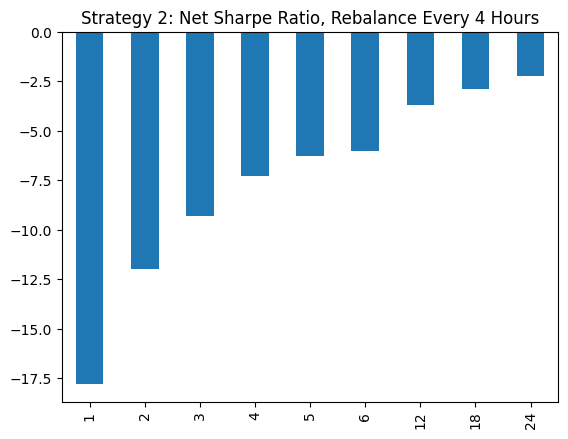

In [30]:
strat_2_4hr_trades["net_sr"].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [31]:
# Rebalance every 8 hours

strat_2_8hr_trades = get_strat_2_results(ret.iloc[::2], 3)
strat_2_8hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.270880,-3.100962,0.328209,0.331086,-0.087354,-9.366026
2,0.419249,-2.046988,0.320060,0.321918,-0.204813,-6.358717
3,0.323284,-1.721204,0.335165,0.337618,-0.187825,-5.098089
4,0.475697,-1.290466,0.329481,0.331586,-0.368624,-3.891801
5,0.520031,-1.093672,0.333597,0.335661,-0.475491,-3.258265
6,0.571950,-0.876651,0.335747,0.336969,-0.652426,-2.601574
12,0.436474,-0.577139,0.318470,0.320192,-0.756272,-1.802479
18,0.324837,-0.515558,0.326547,0.328028,-0.630068,-1.571688
24,0.346823,-0.370937,0.330789,0.331886,-0.934992,-1.117665


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

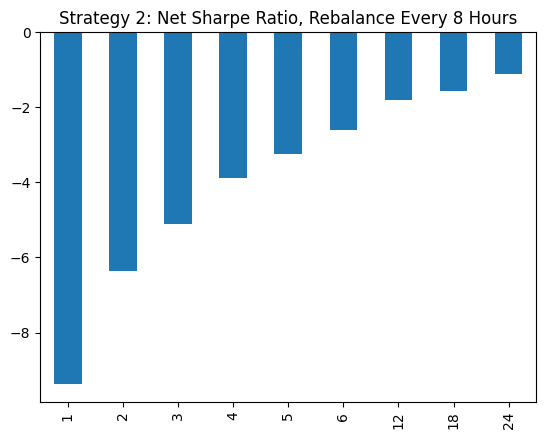

In [32]:
strat_2_8hr_trades["net_sr"].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [33]:
# Rebalance every 12 hours

strat_2_12hr_trades = get_strat_2_results(ret.iloc[::3], 2)
strat_2_12hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.291505,-1.937704,0.267420,0.268596,-0.150438,-7.214202
2,0.107093,-1.545529,0.274131,0.275338,-0.069292,-5.613198
3,0.089565,-1.270101,0.272147,0.274165,-0.070518,-4.632617
4,0.179768,-0.989584,0.274041,0.274871,-0.181660,-3.600178
5,0.113670,-0.956182,0.275147,0.276923,-0.118879,-3.452885
6,0.072566,-0.910513,0.274928,0.276158,-0.079698,-3.297075
12,0.068496,-0.640574,0.264018,0.265174,-0.106929,-2.415672
18,0.041669,-0.548870,0.266990,0.267820,-0.075918,-2.049396
24,0.164511,-0.344174,0.280513,0.281050,-0.477989,-1.224603


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

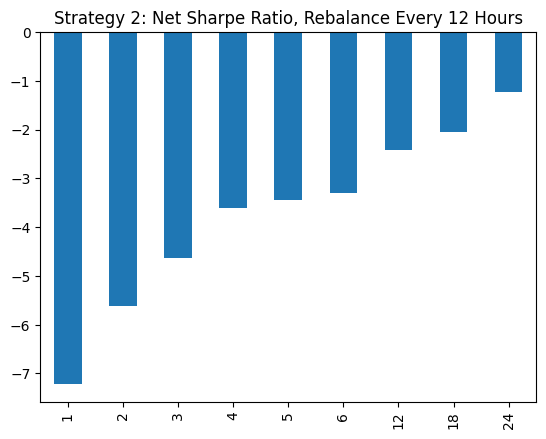

In [34]:
strat_2_12hr_trades['net_sr'].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 12 Hours')

In [35]:
# Rebalance once a day
strat_2_1d_trades = get_strat_2_results(ret.iloc[::6], 1)
strat_2_1d_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.019659,-1.106534,0.180564,0.181738,-0.017767,-6.088611
2,0.085908,-0.728696,0.182086,0.183927,-0.117892,-3.961866
3,0.121881,-0.554470,0.180422,0.181899,-0.219816,-3.048234
4,-0.009331,-0.615189,0.180048,0.182362,0.015168,-3.373454
5,0.083787,-0.452225,0.182748,0.184145,-0.185278,-2.455808
6,0.102307,-0.387263,0.182724,0.184598,-0.264180,-2.097870
12,0.069259,-0.273063,0.190405,0.192810,-0.253639,-1.416229
18,0.120120,-0.157036,0.190027,0.191714,-0.764915,-0.819117
24,0.112195,-0.137773,0.189833,0.191515,-0.814350,-0.719383


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Once A Day'}>

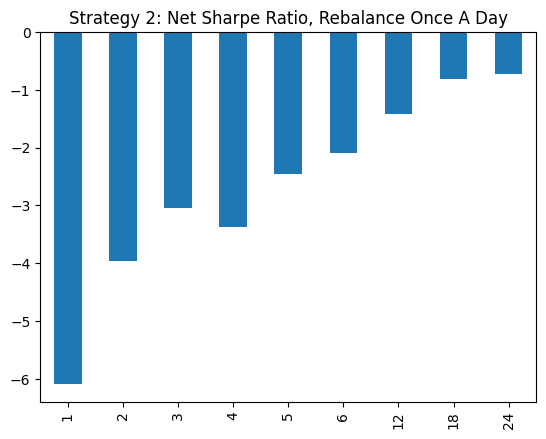

In [36]:
strat_2_1d_trades['net_sr'].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Once A Day')

In [37]:
# Rebalance once every two days

strat_2_2d_trades = get_strat_2_results(ret.iloc[::12], 0.5)
strat_2_2d_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.037218,-0.529259,0.130630,0.130551,-0.070321,-4.054026
2,-0.029148,-0.445097,0.128962,0.128990,0.065487,-3.450639
3,0.025195,-0.309193,0.130434,0.131910,-0.081486,-2.343969
4,-0.021716,-0.313952,0.133815,0.135478,0.069170,-2.317364
5,-0.030863,-0.291121,0.133033,0.133898,0.106013,-2.174195
6,0.002879,-0.236826,0.138924,0.140360,-0.012156,-1.687270
12,-0.006931,-0.187722,0.131415,0.131891,0.036921,-1.423310
18,0.026827,-0.111048,0.129196,0.130094,-0.241582,-0.853597
24,0.040322,-0.079332,0.119621,0.119841,-0.508268,-0.661975


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Once Every Two Days'}>

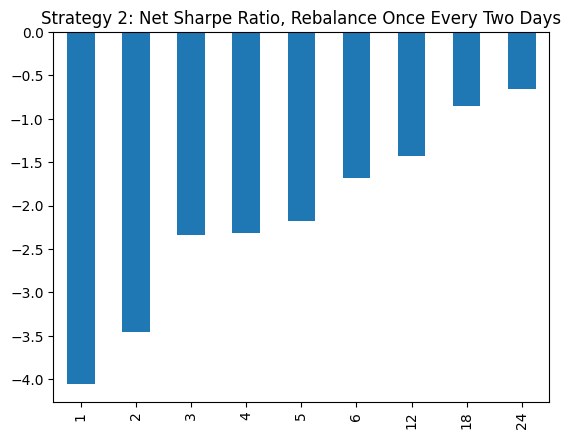

In [38]:
strat_2_2d_trades['net_sr'].plot(kind='bar',
                                 title='Strategy 2: Net Sharpe Ratio, Rebalance Once Every Two Days')

## Strategy 3: Testing With The Most Recent Interval Removed

Similar to strategy 1: difference is to not include most recent 
period in rolling window.

In [39]:
def get_strat_3_signal(ret, window_look_back):
    ranked_avgs = ret.rolling(window=window_look_back, min_periods=1).mean().shift().rank(axis=1)
    demeaned_ranked_avgs = ranked_avgs.subtract(ranked_avgs.mean(axis=1), axis=0)
    return demeaned_ranked_avgs.divide(demeaned_ranked_avgs.abs().sum(axis=1), axis=0)

get_strat_3_signal(ret, 4)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,0.083333,-0.083333,0.166667,-0.166667,0.250000,0.000000,NaN,-0.250000
2025-01-11 00:00:00,0.166667,-0.083333,-0.250000,0.083333,0.250000,0.000000,NaN,-0.166667
2025-01-11 04:00:00,0.166667,-0.083333,-0.250000,0.083333,0.250000,0.000000,NaN,-0.166667
2025-01-11 08:00:00,0.166667,0.083333,-0.250000,-0.083333,0.250000,-0.166667,NaN,0.000000


In [40]:
def get_strat_3_signal_time_horizon_dict(ret):
    strat_3_signal_dict = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_3_signal_dict[t] = get_strat_3_signal(ret, t)
    return strat_3_signal_dict

strat_3_signals_data = get_strat_3_signal_time_horizon_dict(ret)
strat_3_signals_data[4]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,0.083333,-0.083333,0.166667,-0.166667,0.250000,0.000000,NaN,-0.250000
2025-01-11 00:00:00,0.166667,-0.083333,-0.250000,0.083333,0.250000,0.000000,NaN,-0.166667
2025-01-11 04:00:00,0.166667,-0.083333,-0.250000,0.083333,0.250000,0.000000,NaN,-0.166667
2025-01-11 08:00:00,0.166667,0.083333,-0.250000,-0.083333,0.250000,-0.166667,NaN,0.000000


In [41]:
def get_strat_3_gross_returns(strat_3_signals_data, ret):
    strat_3_gross_returns_data = dict()
    for t in strat_3_signals_data:
        strat_3_gross_returns_data[t] = (strat_3_signals_data[t] * ret).sum(axis=1)
    return pd.DataFrame(strat_3_gross_returns_data)

strat_3_gross_returns_df = get_strat_3_gross_returns(strat_3_signals_data, ret)
strat_3_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-1.281039e-03,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281
2020-01-01 12:00:00,2.181741e-03,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558
2020-01-01 16:00:00,-7.816796e-07,0.000616,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451
...,...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-4.158512e-03,0.003543,0.002992,-0.000182,-0.003328,-0.002942,-0.000524,0.002251,0.000348
2025-01-11 00:00:00,8.622794e-04,-0.001063,0.001067,0.002999,-0.000677,-0.003477,-0.002696,0.000613,0.001016
2025-01-11 04:00:00,1.303453e-03,0.000897,0.001775,0.001557,0.001598,0.001537,0.000402,0.001063,0.000911
2025-01-11 08:00:00,3.983938e-03,0.000434,-0.001621,-0.000700,0.000395,0.000445,0.009342,0.000153,0.003422


In [42]:
def get_strat_3_net_returns(strat_3_signals_data, ret):
    strat_3_net_returns_data = dict()
    for t in strat_3_signals_data:
        strat_3_net_returns_data[t] = get_net_return(strat_3_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_3_net_returns_data)

strat_3_net_returns_df = get_strat_3_net_returns(strat_3_signals_data, ret)
strat_3_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 12:00:00,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784
2020-01-01 16:00:00,-0.002072,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096
...,...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,0.003413,0.001183,0.001322,-0.001764,-0.000728,-0.002271,0.002782,0.002173,0.001099
2025-01-11 00:00:00,-0.001856,-0.001061,0.000562,-0.003465,-0.005205,-0.004335,-0.005103,0.000279,0.000562
2025-01-11 04:00:00,-0.003286,0.000649,0.000277,-0.000110,-0.000798,-0.001222,-0.002252,0.000609,0.000661
2025-01-11 08:00:00,-0.003249,-0.003621,-0.002020,0.000395,-0.001555,0.002890,0.002204,0.001310,0.004130


In [43]:
def get_strat_3_results_stats(strat_3_gross_returns_df, strat_3_net_returns_df, periods_per_day):
    strat_3_results_stats_data = dict()
    strat_3_results_stats_data["gross_mean"] = strat_3_gross_returns_df.mean() * 365 * periods_per_day
    strat_3_results_stats_data["net_mean"] = strat_3_net_returns_df.mean() * 365 * periods_per_day
    strat_3_results_stats_data["gross_std"] = strat_3_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_3_results_stats_data["net_std"] = strat_3_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_3_results_stats_data["gross_sr"] = \
        strat_3_results_stats_data["gross_mean"] / strat_3_results_stats_data["gross_std"]
    strat_3_results_stats_data["net_sr"] = \
        strat_3_results_stats_data["net_mean"] / strat_3_results_stats_data["net_std"]
    
    return pd.DataFrame(strat_3_results_stats_data)

get_strat_3_results_stats(strat_3_gross_returns_df, strat_3_net_returns_df, 6)

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.863393,-5.615535,0.325611,0.328523,-2.651607,-17.093298
2,-0.238244,-3.724037,0.331944,0.327573,-0.717723,-11.368570
3,0.031672,-2.784362,0.332883,0.331595,0.095144,-8.396869
4,0.294268,-2.356685,0.340158,0.332138,0.865092,-7.095499
5,0.410369,-2.273089,0.336561,0.333773,1.219300,-6.810283
6,0.205781,-2.040555,0.339170,0.329913,0.606720,-6.185138
12,0.475464,-1.221062,0.337657,0.332899,1.408130,-3.667960
18,0.516677,-0.833099,0.333408,0.329299,1.549683,-2.529914
24,0.474616,-0.676539,0.337384,0.333863,1.406755,-2.026400


In [44]:
def get_strat_3_results(ret, periods_per_day):
    strat_3_signals_data = get_strat_3_signal_time_horizon_dict(ret)
    strat_3_gross_rets_df = get_strat_3_gross_returns(strat_3_signals_data, ret)
    strat_3_net_rets_df = get_strat_3_net_returns(strat_3_signals_data, ret)
    return get_strat_3_results_stats(strat_3_gross_rets_df, strat_3_net_rets_df, periods_per_day)

In [45]:
# Rebalance every 4 hours
strat_3_4hr_results = get_strat_3_results(ret, 6)
strat_3_4hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.863393,-5.615535,0.325611,0.328523,-2.651607,-17.093298
2,-0.238244,-3.724037,0.331944,0.327573,-0.717723,-11.368570
3,0.031672,-2.784362,0.332883,0.331595,0.095144,-8.396869
4,0.294268,-2.356685,0.340158,0.332138,0.865092,-7.095499
5,0.410369,-2.273089,0.336561,0.333773,1.219300,-6.810283
6,0.205781,-2.040555,0.339170,0.329913,0.606720,-6.185138
12,0.475464,-1.221062,0.337657,0.332899,1.408130,-3.667960
18,0.516677,-0.833099,0.333408,0.329299,1.549683,-2.529914
24,0.474616,-0.676539,0.337384,0.333863,1.406755,-2.026400


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

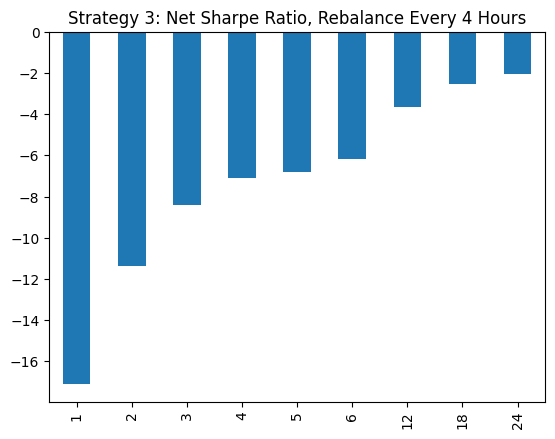

In [46]:
strat_3_4hr_results['net_sr'].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [47]:
strat_3_net_sr_by_year = strat_3_net_returns_df.resample('YE').mean() / strat_3_net_returns_df.std() * np.sqrt(365 * 6)
strat_3_net_sr_by_year

,1,2,3,4,5,6,12,18,24
2020-12-31,-19.672944,-11.806243,-8.820253,-6.107801,-7.879271,-7.469315,-3.935546,-2.198872,-0.875955
2021-12-31,-12.507467,-7.349982,-5.014497,-4.260427,-4.082539,-3.505409,-1.235697,0.172553,0.123040
2022-12-31,-18.105423,-12.873012,-9.763083,-8.496552,-7.571988,-6.898022,-4.573014,-3.102527,-2.809688
2023-12-31,-17.555757,-13.044437,-9.967978,-8.460804,-7.603855,-6.443192,-4.213061,-3.694437,-3.452382
2024-12-31,-17.627779,-11.711353,-8.520548,-8.127661,-6.934797,-6.692677,-4.449316,-3.792378,-3.071848
2025-12-31,-16.702796,-13.274109,-4.854854,-7.921172,-5.978639,-3.179551,-1.282587,-3.602876,-3.581833


<Axes: >

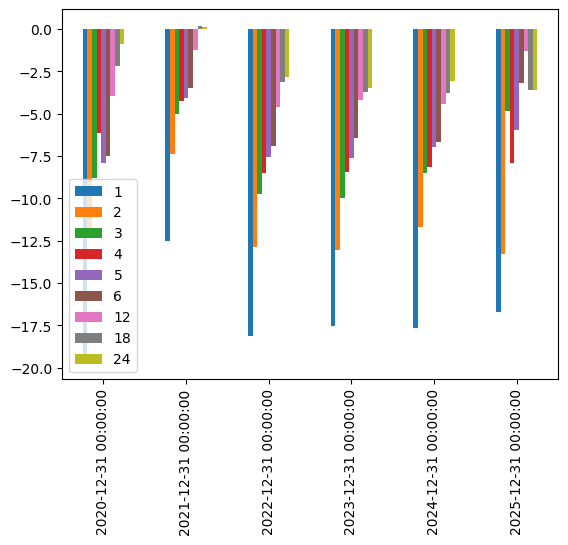

In [48]:
strat_3_net_sr_by_year.plot(kind='bar')

In [49]:
# Rebalance every 8 hours

strat_3_8hr_results = get_strat_3_results(ret.iloc[::2], 3)
strat_3_8hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.197294,-2.618196,0.237932,0.228911,0.829202,-11.437635
2,0.287198,-1.869330,0.234158,0.239716,1.226513,-7.798116
3,0.240294,-1.483574,0.243744,0.240589,0.985844,-6.166434
4,0.325274,-1.279513,0.240751,0.238304,1.351078,-5.369251
5,0.413530,-1.045382,0.242436,0.240604,1.705728,-4.344822
6,0.420393,-0.919302,0.241780,0.235925,1.738740,-3.896585
12,0.307938,-0.640231,0.230498,0.232348,1.335967,-2.755480
18,0.204938,-0.527147,0.237135,0.233762,0.864226,-2.255062
24,0.286731,-0.422273,0.237929,0.235528,1.205114,-1.792876


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

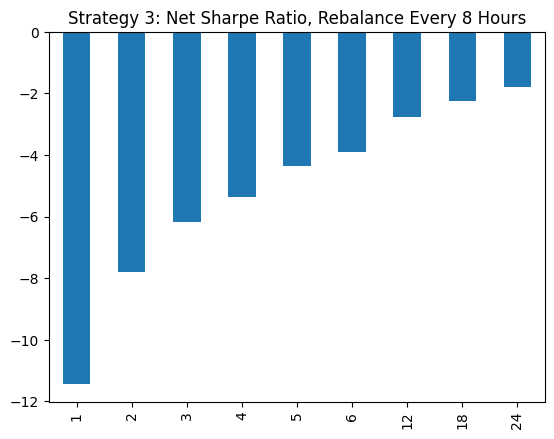

In [50]:
strat_3_8hr_results["net_sr"].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [51]:
# Rebalance every 12 hours

strat_3_12hr_results = get_strat_3_results(ret.iloc[::3], 2)
strat_3_12hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.211789,-1.968729,0.196307,0.199030,1.078869,-9.891638
2,0.081862,-1.391309,0.199703,0.205851,0.409920,-6.758818
3,0.069905,-1.140843,0.199456,0.198784,0.350481,-5.739108
4,0.103499,-1.033831,0.200602,0.203596,0.515941,-5.077869
5,0.055730,-0.907775,0.201666,0.203597,0.276349,-4.458677
6,0.049157,-0.832148,0.201470,0.202144,0.243993,-4.116612
12,0.074323,-0.594664,0.193795,0.194419,0.383516,-3.058670
18,0.029822,-0.439566,0.196357,0.200304,0.151879,-2.194494
24,0.153682,-0.363038,0.202571,0.199617,0.758659,-1.818667


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

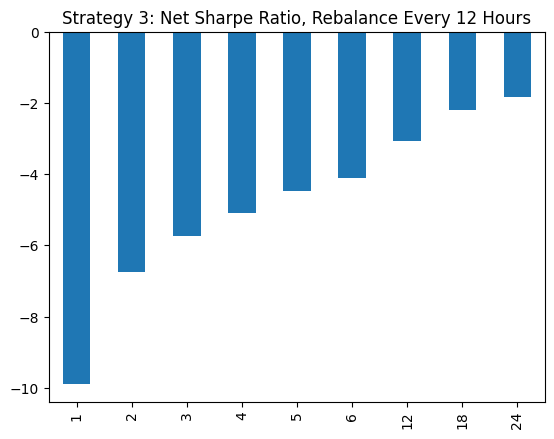

In [52]:
strat_3_12hr_results["net_sr"].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 12 Hours')

In [53]:
# Rebalance once a day

strat_3_1d_results = get_strat_3_results(ret.iloc[::6], 1)
strat_3_1d_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.007626,-0.877381,0.135485,0.129920,0.056288,-6.753216
2,0.083172,-0.551977,0.132077,0.129481,0.629719,-4.262985
3,0.057239,-0.480657,0.132070,0.126927,0.433396,-3.786872
4,-0.005489,-0.407292,0.128568,0.128039,-0.042694,-3.181014
5,0.026508,-0.328335,0.130729,0.132302,0.202773,-2.481707
6,0.046593,-0.277484,0.132831,0.132021,0.350771,-2.101814
12,0.052148,-0.138226,0.138680,0.128093,0.376032,-1.079107
18,0.108117,-0.103194,0.136412,0.133616,0.792581,-0.772322
24,0.097071,-0.073930,0.134695,0.129743,0.720675,-0.569816


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Once A Day'}>

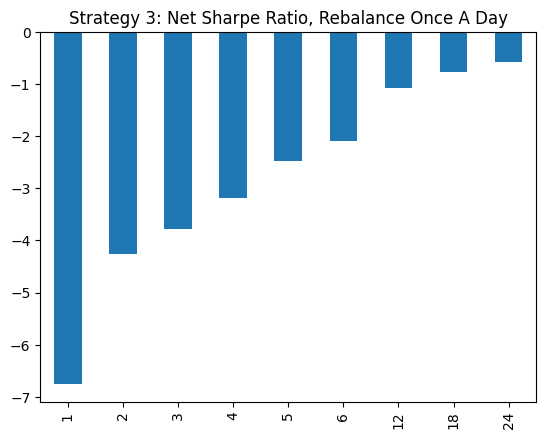

In [54]:
strat_3_1d_results['net_sr'].plot(kind='bar', title="Strategy 3: Net Sharpe Ratio, Rebalance Once A Day")

In [55]:
strat_3_2d_results = get_strat_3_results(ret.iloc[::12], 0.5)
strat_3_2d_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.063696,-0.442132,0.096410,0.094631,0.660685,-4.672144
2,0.037806,-0.351751,0.095991,0.094352,0.393853,-3.728074
3,0.031634,-0.291043,0.097261,0.091559,0.325253,-3.178759
4,-0.015094,-0.263367,0.094624,0.089812,-0.159513,-2.932411
5,-0.014681,-0.216256,0.096173,0.098359,-0.152655,-2.198649
6,-0.005414,-0.208075,0.098941,0.100427,-0.054720,-2.071899
12,0.011996,-0.120851,0.099751,0.095966,0.120260,-1.259301
18,0.042410,-0.074858,0.094874,0.095614,0.447018,-0.782917
24,0.029992,-0.049699,0.097509,0.097341,0.307583,-0.510572


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Once Every Two Days'}>

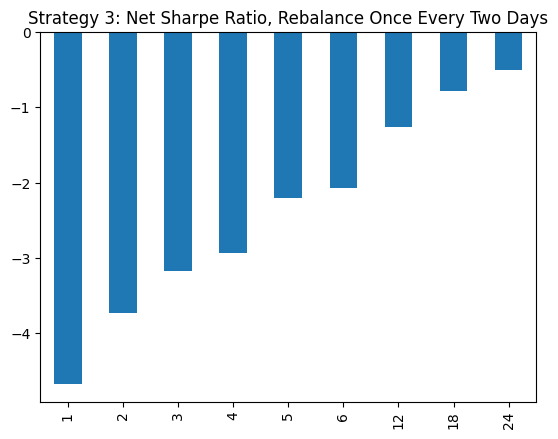

In [56]:
strat_3_2d_results['net_sr'].plot(kind='bar',
                                  title='Strategy 3: Net Sharpe Ratio, Rebalance Once Every Two Days')

## Strategy 4: Trade Around Periods Of High Volume With New Information

Use high volume as a signal for high activity. When this is coupled with activity (e.g. look up on Twitter), then this could combine to yield momentum.

Try using exponential decay for the moving average: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

In [57]:
def get_strat_4_signal(volume_df, window_look_back):
    volume_change = (volume_df / volume_df.shift() - 1).rolling(window=window_look_back, min_periods=1).mean()
    demeaned_volume_change = volume_change.rank(axis=1).subtract(volume_change.rank(axis=1).mean(axis=1), axis=0)
    return demeaned_volume_change.divide(demeaned_volume_change.abs().sum(axis=1), axis=0)

get_strat_4_signal(volume_df, 6)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-0.093750,0.218750,-0.156250,0.031250,0.093750,-0.031250,-0.21875,0.156250
2025-01-11 00:00:00,-0.166667,0.250000,-0.250000,0.000000,0.083333,-0.083333,NaN,0.166667
2025-01-11 04:00:00,-0.166667,0.250000,-0.250000,0.000000,0.083333,-0.083333,NaN,0.166667
2025-01-11 08:00:00,-0.166667,0.250000,-0.250000,0.000000,0.083333,-0.083333,NaN,0.166667


In [58]:
def get_strat_4_signal_time_horizon_dict(volume_df):
    strat_4_signal_dict = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_4_signal_dict[t] = get_strat_4_signal(volume_df, t)
    return strat_4_signal_dict

strat_4_signals_data = get_strat_4_signal_time_horizon_dict(volume_df)
strat_4_signals_data[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-0.093750,0.218750,-0.156250,0.031250,0.093750,-0.031250,-0.21875,0.156250
2025-01-11 00:00:00,-0.166667,0.250000,-0.250000,0.000000,0.083333,-0.083333,NaN,0.166667
2025-01-11 04:00:00,-0.166667,0.250000,-0.250000,0.000000,0.083333,-0.083333,NaN,0.166667
2025-01-11 08:00:00,-0.166667,0.250000,-0.250000,0.000000,0.083333,-0.083333,NaN,0.166667


In [59]:
def get_strat_4_gross_returns(strat_4_signals_data, ret):
    strat_4_gross_returns_data = dict()
    for t in strat_4_signals_data:
        strat_4_gross_returns_data[t] = (strat_4_signals_data[t].shift() * ret).sum(axis=1)
    return pd.DataFrame(strat_4_gross_returns_data)

strat_4_gross_returns_df = get_strat_4_gross_returns(strat_4_signals_data, ret)
strat_4_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469
2020-01-01 12:00:00,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008
2020-01-01 16:00:00,-0.000210,-0.001239,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248
...,...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,0.001474,-0.000607,-0.000607,-0.000607,-0.001880,-0.001880,-0.002283,0.000612,0.001042
2025-01-11 00:00:00,0.001993,-0.001442,0.001674,0.001674,0.001674,-0.000488,-0.001026,0.002666,0.001979
2025-01-11 04:00:00,-0.000798,-0.000579,0.000187,0.000294,0.000294,0.000294,-0.000421,0.000004,-0.000417
2025-01-11 08:00:00,-0.004261,-0.005738,-0.005639,-0.000688,-0.004062,-0.004062,0.002453,-0.005339,-0.008649


In [60]:
def get_strat_4_net_returns(strat_4_signals_data, ret):
    strat_4_net_returns_data = dict()
    for t in strat_4_signals_data:
        strat_4_net_returns_data[t] = get_net_return(strat_4_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_4_net_returns_data)

strat_4_net_returns_df = get_strat_4_net_returns(strat_4_signals_data, ret)
strat_4_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469
2020-01-01 12:00:00,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674
2020-01-01 16:00:00,-0.002876,-0.003239,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248
...,...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-0.001860,-0.001274,-0.001274,-0.001941,-0.002380,-0.002380,-0.004033,0.000362,0.001042
2025-01-11 00:00:00,-0.000674,-0.004442,0.001674,0.001674,0.000632,-0.000488,-0.001026,0.002666,0.001979
2025-01-11 04:00:00,-0.003132,-0.004579,-0.002146,0.000294,0.000294,-0.000748,-0.000671,0.000004,-0.000417
2025-01-11 08:00:00,-0.007261,-0.007405,-0.007639,-0.002688,-0.004062,-0.004062,0.002203,-0.005589,-0.008649


In [61]:
# strat_4_net_returns_df.mean()

def get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, periods_per_day):
    strat_4_results_stats_data = dict()
    strat_4_results_stats_data["gross_mean"] = strat_4_gross_returns_df.mean() * 365 * periods_per_day
    strat_4_results_stats_data["gross_std"] = strat_4_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_4_results_stats_data["net_mean"] = strat_4_net_returns_df.mean() * 365 * periods_per_day
    strat_4_results_stats_data["net_std"] = strat_4_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_4_results_stats_data["gross_sr"] = strat_4_results_stats_data["gross_mean"] / strat_4_results_stats_data["gross_std"]
    strat_4_results_stats_data["net_sr"] = strat_4_results_stats_data["net_mean"] / strat_4_results_stats_data["net_std"]
    return pd.DataFrame(strat_4_results_stats_data)

get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, 6)

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.052770,0.295563,-6.824122,0.297264,0.178540,-22.956458
2,0.306595,0.295421,-4.629134,0.299029,1.037824,-15.480528
3,0.194838,0.296708,-3.803428,0.300579,0.656665,-12.653657
4,0.246716,0.295880,-3.240058,0.299846,0.833840,-10.805730
5,0.295405,0.294157,-2.773680,0.297430,1.004241,-9.325494
6,0.393521,0.299649,-2.260249,0.302281,1.313273,-7.477321
12,0.230401,0.300086,-1.481848,0.301720,0.767784,-4.911336
18,0.054536,0.301769,-1.214605,0.302635,0.180722,-4.013431
24,-0.014651,0.304738,-1.022399,0.306056,-0.048079,-3.340561


In [62]:
def get_strat_4_results(ret, volume_df, periods_per_day):
    strat_4_signals_data = get_strat_4_signal_time_horizon_dict(volume_df)
    strat_4_gross_returns_df = get_strat_4_gross_returns(strat_4_signals_data, ret)
    strat_4_net_returns_df = get_strat_4_net_returns(strat_4_signals_data, ret)
    return get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, periods_per_day)

In [63]:
strat_4_4hr_results = get_strat_4_results(ret, volume_df, 6)
strat_4_4hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.052770,0.295563,-6.824122,0.297264,0.178540,-22.956458
2,0.306595,0.295421,-4.629134,0.299029,1.037824,-15.480528
3,0.194838,0.296708,-3.803428,0.300579,0.656665,-12.653657
4,0.246716,0.295880,-3.240058,0.299846,0.833840,-10.805730
5,0.295405,0.294157,-2.773680,0.297430,1.004241,-9.325494
6,0.393521,0.299649,-2.260249,0.302281,1.313273,-7.477321
12,0.230401,0.300086,-1.481848,0.301720,0.767784,-4.911336
18,0.054536,0.301769,-1.214605,0.302635,0.180722,-4.013431
24,-0.014651,0.304738,-1.022399,0.306056,-0.048079,-3.340561


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

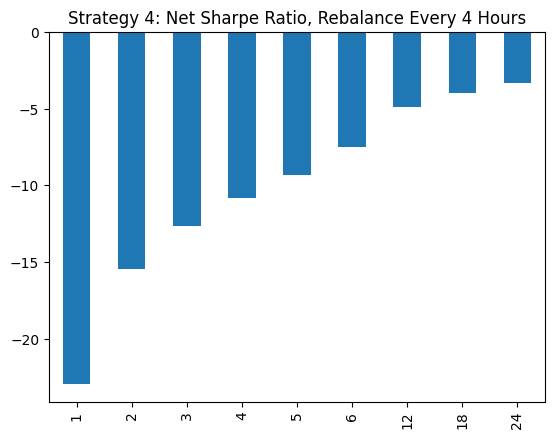

In [64]:
strat_4_4hr_results["net_sr"].plot(kind='bar', title='Strategy 4: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [65]:
strat_4_8hr_results = get_strat_4_results(ret[::2], volume_df[::2], 3)
strat_4_8hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.100723,0.216657,-3.422350,0.217206,0.464896,-15.756216
2,0.051391,0.213269,-2.421068,0.215904,0.240968,-11.213643
3,0.129148,0.218150,-1.721593,0.220421,0.592015,-7.810474
4,0.153305,0.217361,-1.488205,0.219755,0.705300,-6.772100
5,0.236186,0.217726,-1.235282,0.219889,1.084786,-5.617756
6,0.242189,0.219289,-0.995220,0.221146,1.104429,-4.500287
12,0.168944,0.220773,-0.601983,0.221768,0.765239,-2.714475
18,0.126255,0.214568,-0.441488,0.215410,0.588417,-2.049526
24,0.142120,0.214501,-0.324980,0.215125,0.662558,-1.510660


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

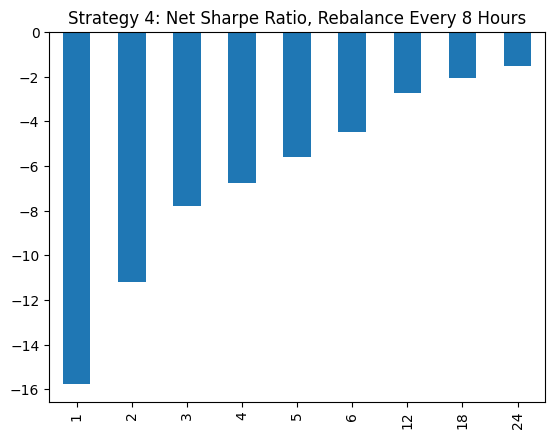

In [66]:
strat_4_8hr_results['net_sr'].plot(kind='bar', title='Strategy 4: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [67]:
strat_4_12hr_results = get_strat_4_results(ret[::3], volume_df[::3], 2)
strat_4_12hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.077124,0.183852,-2.288486,0.184205,0.419489,-12.423594
2,0.059276,0.185395,-1.578808,0.186314,0.319730,-8.473893
3,0.057397,0.182746,-1.315154,0.184008,0.314081,-7.147279
4,0.103043,0.183797,-1.051568,0.185324,0.560636,-5.674220
5,0.016866,0.186880,-1.029522,0.188378,0.090252,-5.465203
6,0.030858,0.187918,-0.891469,0.189177,0.164209,-4.712352
12,0.073504,0.182469,-0.521544,0.182906,0.402828,-2.851435
18,0.042909,0.183989,-0.408818,0.184026,0.233214,-2.221527
24,0.055697,0.178829,-0.303318,0.179558,0.311452,-1.689252


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

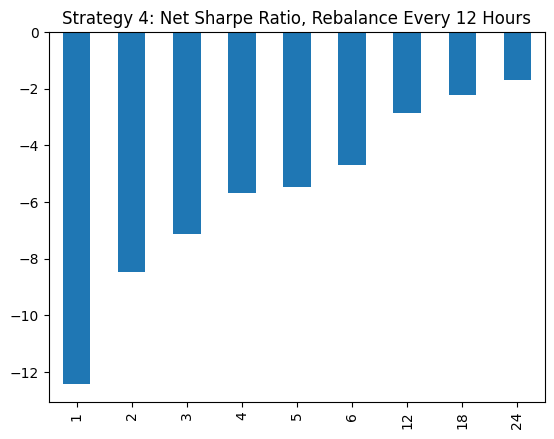

In [68]:
strat_4_12hr_results["net_sr"].plot(kind="bar",
                                    title="Strategy 4: Net Sharpe Ratio, Rebalance Every 12 Hours")

In [69]:
strat_4_1d_results = get_strat_4_results(ret[::6], volume_df[::6], 1)
strat_4_1d_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.047926,0.123248,-1.126572,0.123762,0.388854,-9.102756
2,-0.021919,0.127132,-0.850859,0.128205,-0.172412,-6.636680
3,0.025373,0.131709,-0.649624,0.133375,0.192645,-4.870661
4,0.001998,0.129579,-0.580761,0.130714,0.015423,-4.442984
5,0.013624,0.120144,-0.504497,0.121440,0.113395,-4.154272
6,-0.010545,0.117359,-0.479469,0.118656,-0.089853,-4.040823
12,-0.014805,0.119892,-0.313047,0.120551,-0.123485,-2.596798
18,0.014056,0.124096,-0.213278,0.124763,0.113265,-1.709468
24,0.004902,0.116410,-0.180218,0.116359,0.042112,-1.548809


In [70]:
strat_4_2d_results = get_strat_4_results(ret[::12], volume_df[::12], 0.5)
strat_4_2d_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,-0.018810,0.091230,-0.603399,0.091750,-0.206183,-6.576562
2,-0.001677,0.089409,-0.410849,0.091345,-0.018759,-4.497766
3,-0.001971,0.087574,-0.323015,0.088600,-0.022505,-3.645775
4,0.020366,0.088198,-0.259945,0.088886,0.230913,-2.924487
5,0.008127,0.091009,-0.244703,0.091551,0.089299,-2.672868
6,0.010553,0.093235,-0.213570,0.094030,0.113189,-2.271303
12,0.006567,0.086756,-0.129947,0.087182,0.075696,-1.490526
18,-0.031267,0.094302,-0.134473,0.094600,-0.331562,-1.421500
24,-0.017785,0.095195,-0.106909,0.095488,-0.186830,-1.119605


In [71]:
exponential_volume_change = (volume_df / volume_df.shift() - 1).ewm(alpha=0.1).mean()
exponential_volume_change

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.912909,-0.737362,0.207615,-0.200842,-0.951267,NaN,NaN,NaN
2020-01-01 08:00:00,0.034552,0.279374,-0.356284,1.051004,-0.201748,NaN,NaN,NaN
2020-01-01 12:00:00,0.977872,0.377529,-0.066166,0.413377,-0.465335,NaN,NaN,NaN
2020-01-01 16:00:00,0.614874,0.046652,-0.032906,0.378402,2.289373,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,0.604933,3.660463,0.666581,1.345886,1.744179,1.343139,3.7527,3.636581
2025-01-11 00:00:00,0.462598,3.292106,0.575539,1.271571,1.531718,1.127300,3.7527,3.258639
2025-01-11 04:00:00,0.364169,2.910930,0.440984,1.096920,1.335391,1.078520,3.7527,2.918727
2025-01-11 08:00:00,0.284439,2.599603,0.661483,0.982212,1.326212,0.898974,3.7527,2.569100


In [72]:
demeaned_exponential_volume_change = exponential_volume_change.rank(axis=1).subtract(
    exponential_volume_change.rank(axis=1).mean(axis=1), axis=0)
exponential_volume_holdings = demeaned_exponential_volume_change.divide(demeaned_exponential_volume_change.abs().sum(axis=1), axis=0)
exponential_volume_holdings

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-0.218750,0.156250,-0.156250,-0.031250,0.031250,-0.09375,0.21875,0.09375
2025-01-11 00:00:00,-0.218750,0.156250,-0.156250,-0.031250,0.031250,-0.09375,0.21875,0.09375
2025-01-11 04:00:00,-0.218750,0.093750,-0.156250,-0.031250,0.031250,-0.09375,0.21875,0.15625
2025-01-11 08:00:00,-0.218750,0.156250,-0.156250,-0.031250,0.031250,-0.09375,0.21875,0.09375


In [73]:
exponential_volume_gross_returns = (exponential_volume_holdings.shift() * ret).sum(axis=1)
exponential_volume_gross_returns

2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.002469
2020-01-01 12:00:00   -0.001008
2020-01-01 16:00:00   -0.002248
                         ...   
2025-01-10 20:00:00   -0.001207
2025-01-11 00:00:00    0.002462
2025-01-11 04:00:00    0.000291
2025-01-11 08:00:00   -0.005339
2025-01-11 12:00:00    0.003070
Freq: 4h, Length: 11026, dtype: float64

In [74]:
exponential_volume_gross_returns.mean() * 365 * 6

0.18607216178732738

In [75]:
exponential_volume_gross_returns.mean() / exponential_volume_gross_returns.std() * np.sqrt(365 * 6)

0.6335386639659595

In [76]:
exponential_volume_net_returns = get_net_return(exponential_volume_holdings.shift(), ret)
exponential_volume_net_returns

2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000469
2020-01-01 12:00:00   -0.003674
2020-01-01 16:00:00   -0.004248
                         ...   
2025-01-10 20:00:00   -0.001457
2025-01-11 00:00:00    0.001962
2025-01-11 04:00:00    0.000291
2025-01-11 08:00:00   -0.005589
2025-01-11 12:00:00    0.002820
Freq: 4h, Length: 11026, dtype: float64

In [77]:
exponential_volume_net_returns.mean() * 365 * 6

-1.165709498228393

Try weighting earlier volume changes more.

In [78]:
volume_change_df = volume_df / volume_df.shift() - 1
volume_change_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.912909,-0.737362,0.207615,-0.200842,-0.951267,NaN,NaN,NaN
2020-01-01 08:00:00,0.887267,1.194437,-0.863793,2.177665,0.472819,NaN,NaN,NaN
2020-01-01 12:00:00,2.590949,0.545372,0.429937,-0.676966,-0.916069,NaN,NaN,NaN
2020-01-01 16:00:00,-0.270478,-0.760356,0.048214,0.293099,9.008108,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-0.441599,-0.264656,-0.676290,-0.762992,-0.639683,-0.764866,NaN,-0.551089
2025-01-11 00:00:00,-0.818414,-0.023113,-0.243842,0.602730,-0.380431,-0.815252,NaN,-0.142838
2025-01-11 04:00:00,-0.521694,-0.519650,-0.770006,-0.474938,-0.431546,0.639499,NaN,-0.140481
2025-01-11 08:00:00,-0.433131,-0.202345,2.645967,-0.050160,1.243602,-0.716932,NaN,-0.577539


In [79]:
reverse_exponential_weighting = (volume_change_df + 2 * volume_change_df.shift() + 4 * volume_change_df.shift(2) + 8 * volume_change_df.shift(3)) / 15
reverse_exponential_weighting

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,0.077148,-0.052717,-0.059078,0.402873,0.097140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,1.469575,10.730628,0.586544,2.027979,4.656520,0.997991,NaN,8.993613
2025-01-11 00:00:00,3.576561,22.365162,1.816053,4.904345,10.043624,2.337065,NaN,18.841856
2025-01-11 04:00:00,-0.478240,-0.477220,-0.561674,-0.510629,-0.076519,3.122598,NaN,-0.438022
2025-01-11 08:00:00,-0.552198,-0.230090,-0.351982,-0.312870,-0.417245,-0.587858,NaN,-0.389238


In [80]:
ranked_rew = reverse_exponential_weighting.rank(axis=1).subtract(reverse_exponential_weighting.rank(axis=1).mean(axis=1), axis=0)
rrew = ranked_rew.divide(ranked_rew.abs().sum(axis=1), axis=0)
rrew

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,0.000000,-0.166667,-0.333333,0.333333,0.166667,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-10 20:00:00,-0.083333,0.250000,-0.250000,0.000000,0.083333,-0.166667,NaN,0.166667
2025-01-11 00:00:00,-0.083333,0.250000,-0.250000,0.000000,0.083333,-0.166667,NaN,0.166667
2025-01-11 04:00:00,-0.083333,0.000000,-0.250000,-0.166667,0.166667,0.250000,NaN,0.083333
2025-01-11 08:00:00,-0.166667,0.250000,0.083333,0.166667,-0.083333,-0.250000,NaN,0.000000


In [81]:
get_net_return(rrew.shift(), ret).mean() * 365 * 6

-4.297575496860485

Try grouping data by day (less specific granularity).

In [82]:
daily_volume_df = volume_df.groupby(volume_df.index.date).sum()
daily_volume_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01,31.403883,419.85641,333132.3,1210.780,568474.4,0.00,0.0,0.000
2020-01-02,67.004407,298.29122,257302.4,2052.780,124152.7,0.00,0.0,0.000
2020-01-03,102.621386,513.53291,422872.0,7458.020,183712.9,0.00,0.0,0.000
2020-01-04,32.271372,87.49993,199212.9,1956.270,96464.2,0.00,0.0,0.000
2020-01-05,67.247638,275.28558,553095.4,2998.830,168050.5,0.00,0.0,0.000
...,...,...,...,...,...,...,...,...
2025-01-07,19.976560,407.60400,1233459.9,449.846,1320869.0,29886.95,215879.0,8321.302
2025-01-08,22.734570,196.66370,1036650.7,444.663,905236.0,5286.06,91809.5,10575.725
2025-01-09,21.902520,157.85480,1060132.1,337.270,457544.0,7067.76,16137.0,5170.333
2025-01-10,23.755250,114.95760,1044841.7,606.852,453875.0,8120.42,431.1,3917.962


In [83]:
daily_volume_change_df = daily_volume_df / daily_volume_df.shift() - 1
daily_volume_change_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,1.133634,-0.289540,-0.227627,0.695419,-0.781604,NaN,NaN,NaN
2020-01-03,0.531562,0.721582,0.643483,2.633132,0.479733,NaN,NaN,NaN
2020-01-04,-0.685530,-0.829612,-0.528905,-0.737696,-0.474919,NaN,NaN,NaN
2020-01-05,1.083817,2.146123,1.776404,0.532933,0.742102,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-07,-0.132527,0.600376,0.163618,-0.230609,1.811011,0.536335,1.123316,0.328416
2025-01-08,0.138062,-0.517513,-0.159559,-0.011522,-0.314666,-0.823132,-0.574718,0.270922
2025-01-09,-0.036598,-0.197336,0.022651,-0.241515,-0.494558,0.337056,-0.824234,-0.511113
2025-01-10,0.084590,-0.271751,-0.014423,0.799306,-0.008019,0.148938,-0.973285,-0.242223


In [84]:
start_time_px = px_df[px_df.index.hour == 0]
start_time_ret = start_time_px / start_time_px.shift() - 1
start_time_ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,-0.014270,-0.009372,0.005441,-0.019651,-0.009224,NaN,NaN,NaN
2020-01-03,-0.024461,-0.014888,-0.011425,-0.025619,-0.032090,NaN,NaN,NaN
2020-01-04,0.055064,0.049512,0.035280,0.035174,0.037507,NaN,NaN,NaN
2020-01-05,0.018916,0.018300,0.020858,0.027010,0.007976,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-07,0.027128,0.003540,-0.001651,0.021416,-0.005717,-0.011007,-0.007856,0.006349
2025-01-08,-0.050687,-0.085750,-0.085722,-0.037834,-0.032164,-0.101333,-0.098687,-0.084960
2025-01-09,-0.024054,-0.011154,-0.058688,-0.004132,0.012613,-0.031538,-0.022070,-0.020029
2025-01-10,-0.006818,-0.020197,-0.016547,-0.012262,-0.027803,-0.014275,-0.015776,-0.025985


In [85]:
rolling_daily_mean = daily_volume_change_df.rolling(window=3, min_periods=1).mean()
demeaned_daily_rank = rolling_daily_mean.rank(axis=1).subtract(rolling_daily_mean.rank(axis=1).mean(axis=1), axis=0)
rolling_daily_holdings = demeaned_daily_rank.divide(demeaned_daily_rank.abs().sum(axis=1), axis=0)
# rolling_daily_holdings

daily_volume_net_returns = get_net_return(rolling_daily_holdings.shift(2), start_time_ret) * 365
daily_volume_net_returns

2020-01-01    0.000000
2020-01-02    0.000000
2020-01-03    0.000000
2020-01-04    0.533887
2020-01-05    1.711026
                ...   
2025-01-07   -0.467698
2025-01-08   -3.526156
2025-01-09    0.075921
2025-01-10   -0.261523
2025-01-11   -0.404148
Length: 1838, dtype: float64

<Axes: >

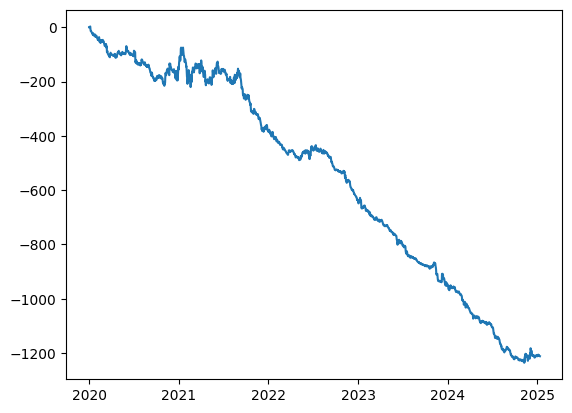

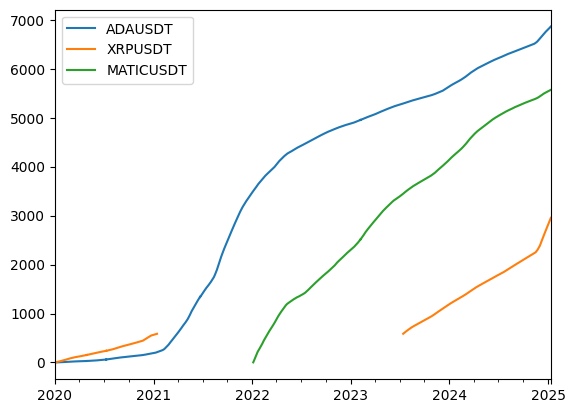

In [86]:
daily_volume_net_returns.cumsum().plot()
px_df.drop(columns=["BTCUSDT", "ETHUSDT","BNBUSDT","SOLUSDT","DOTUSDT"]).cumsum().plot()

Only trade coins with a change in volume above a certain threshold in absolute value.

## Strategy 5: Use Volume Traded Times Change In Price Over Interval As Signal

## Strategy 6: Pairs Trading For Cryptocurrencies (Reversal Strategy)

Observe the correlation between the different cryptocurrencies and try to apply pairs trading for highly correlated pairs.

In [87]:
px_df.corr()

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
BTCUSDT,1.000000,0.854259,0.494994,0.880695,0.735969,0.089266,-0.254158,0.839293
ETHUSDT,0.854259,1.000000,0.696598,0.918561,0.613613,0.514683,0.113725,0.864776
ADAUSDT,0.494994,0.696598,1.000000,0.536509,0.842699,0.897753,0.598519,0.396881
BNBUSDT,0.880695,0.918561,0.536509,1.000000,0.629828,0.228091,-0.139390,0.849630
XRPUSDT,0.735969,0.613613,0.842699,0.629828,1.000000,0.378999,-0.100425,0.535078
DOTUSDT,0.089266,0.514683,0.897753,0.228091,0.378999,1.000000,0.815793,0.331500
MATICUSDT,-0.254158,0.113725,0.598519,-0.139390,-0.100425,0.815793,1.000000,-0.128459
SOLUSDT,0.839293,0.864776,0.396881,0.849630,0.535078,0.331500,-0.128459,1.000000


There is a strong historical correlation between ETHUSDT and BNBUSDT of ~0.919. There are also fairly strong correlations between BTCUSDT and BNBUSDT

<Axes: >

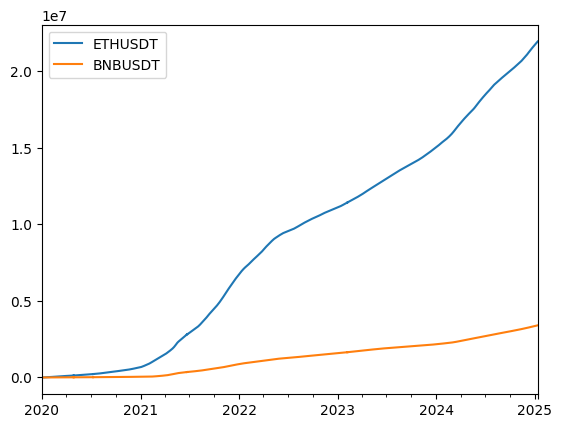

In [88]:
px_df[["ETHUSDT", "BNBUSDT"]].cumsum().plot()

In [89]:
import statsmodels.api as sm

X = px_df["BNBUSDT"]
X = sm.add_constant(X)
X

,const,BNBUSDT
2020-01-01 00:00:00,1.0,13.8159
2020-01-01 04:00:00,1.0,13.7648
2020-01-01 08:00:00,1.0,13.7162
2020-01-01 12:00:00,1.0,13.7958
2020-01-01 16:00:00,1.0,13.7270
...,...,...
2025-01-10 20:00:00,1.0,693.4000
2025-01-11 00:00:00,1.0,691.2500
2025-01-11 04:00:00,1.0,689.8800
2025-01-11 08:00:00,1.0,695.7500


In [90]:
Y = px_df["ETHUSDT"]
Y

2020-01-01 00:00:00     130.18
2020-01-01 04:00:00     130.52
2020-01-01 08:00:00     130.84
2020-01-01 12:00:00     131.84
2020-01-01 16:00:00     131.98
                        ...   
2025-01-10 20:00:00    3269.76
2025-01-11 00:00:00    3241.51
2025-01-11 04:00:00    3234.33
2025-01-11 08:00:00    3277.22
2025-01-11 12:00:00    3270.27
Freq: 4h, Name: ETHUSDT, Length: 11026, dtype: float64

In [91]:
drop_X = X[X["BNBUSDT"].isna()].index
drop_X

DatetimeIndex(['2020-04-28 04:00:00', '2020-04-28 08:00:00',
               '2020-07-09 04:00:00', '2020-07-09 08:00:00',
               '2021-06-22 04:00:00', '2023-02-06 08:00:00'],
              dtype='datetime64[ns]', freq=None)

In [92]:
X = X.drop(drop_X)
X

,const,BNBUSDT
2020-01-01 00:00:00,1.0,13.8159
2020-01-01 04:00:00,1.0,13.7648
2020-01-01 08:00:00,1.0,13.7162
2020-01-01 12:00:00,1.0,13.7958
2020-01-01 16:00:00,1.0,13.7270
...,...,...
2025-01-10 20:00:00,1.0,693.4000
2025-01-11 00:00:00,1.0,691.2500
2025-01-11 04:00:00,1.0,689.8800
2025-01-11 08:00:00,1.0,695.7500


In [93]:
X[X["BNBUSDT"].isna()]

,const,BNBUSDT


In [94]:
drop_Y = Y[Y.isna()].index
drop_Y

DatetimeIndex(['2020-04-28 04:00:00', '2020-04-28 08:00:00',
               '2020-07-09 04:00:00', '2020-07-09 08:00:00',
               '2021-06-22 04:00:00', '2023-02-06 08:00:00'],
              dtype='datetime64[ns]', freq=None)

In [95]:
Y = Y.drop(drop_Y)
Y

2020-01-01 00:00:00     130.18
2020-01-01 04:00:00     130.52
2020-01-01 08:00:00     130.84
2020-01-01 12:00:00     131.84
2020-01-01 16:00:00     131.98
                        ...   
2025-01-10 20:00:00    3269.76
2025-01-11 00:00:00    3241.51
2025-01-11 04:00:00    3234.33
2025-01-11 08:00:00    3277.22
2025-01-11 12:00:00    3270.27
Name: ETHUSDT, Length: 11020, dtype: float64

In [96]:
Y[Y.isna()]

Series([], Name: ETHUSDT, dtype: float64)

In [97]:
model_ols = sm.OLS(Y, X)
model_ols

In [98]:
results_ols = model_ols.fit()
results_ols.params

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


const      340.643723
BNBUSDT      5.339824
dtype: float64

In [99]:
X["OLS Reg Model"] = X["BNBUSDT"] * results_ols.params["BNBUSDT"] + results_ols.params["const"]
X

,const,BNBUSDT,OLS Reg Model
2020-01-01 00:00:00,1.0,13.8159,414.418202
2020-01-01 04:00:00,1.0,13.7648,414.145337
2020-01-01 08:00:00,1.0,13.7162,413.885822
2020-01-01 12:00:00,1.0,13.7958,414.310872
2020-01-01 16:00:00,1.0,13.7270,413.943492
...,...,...,...
2025-01-10 20:00:00,1.0,693.4000,4043.277942
2025-01-11 00:00:00,1.0,691.2500,4031.797320
2025-01-11 04:00:00,1.0,689.8800,4024.481760
2025-01-11 08:00:00,1.0,695.7500,4055.826529


In [100]:
X["residuals"] = Y - X["OLS Reg Model"]
X["ETHUSDT"] = Y
X

,const,BNBUSDT,OLS Reg Model,residuals,ETHUSDT
2020-01-01 00:00:00,1.0,13.8159,414.418202,-284.238202,130.18
2020-01-01 04:00:00,1.0,13.7648,414.145337,-283.625337,130.52
2020-01-01 08:00:00,1.0,13.7162,413.885822,-283.045822,130.84
2020-01-01 12:00:00,1.0,13.7958,414.310872,-282.470872,131.84
2020-01-01 16:00:00,1.0,13.7270,413.943492,-281.963492,131.98
...,...,...,...,...,...
2025-01-10 20:00:00,1.0,693.4000,4043.277942,-773.517942,3269.76
2025-01-11 00:00:00,1.0,691.2500,4031.797320,-790.287320,3241.51
2025-01-11 04:00:00,1.0,689.8800,4024.481760,-790.151760,3234.33
2025-01-11 08:00:00,1.0,695.7500,4055.826529,-778.606529,3277.22


<Axes: >

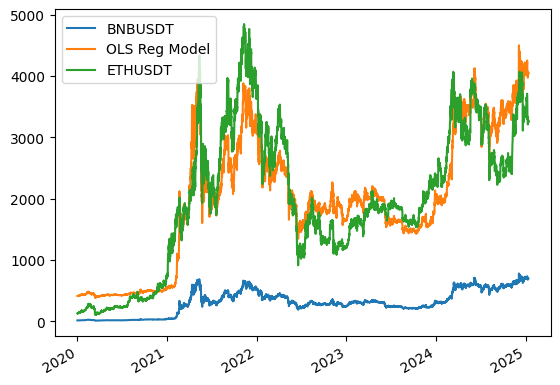

In [101]:
X[["BNBUSDT", "OLS Reg Model", "ETHUSDT"]].plot()

In [102]:
X[["OLS Reg Model"]].corrwith(X["ETHUSDT"])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


OLS Reg Model    0.918561
dtype: float64

<Axes: >

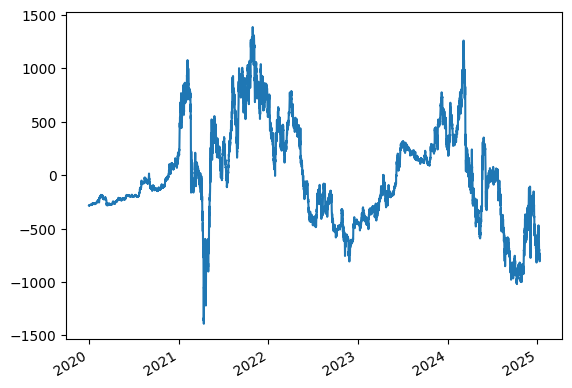

In [103]:
X["residuals"].plot()

In [104]:
early_X = X.iloc[:(X.shape[0] // 2)]
early_X

,const,BNBUSDT,OLS Reg Model,residuals,ETHUSDT
2020-01-01 00:00:00,1.0,13.8159,414.418202,-284.238202,130.18
2020-01-01 04:00:00,1.0,13.7648,414.145337,-283.625337,130.52
2020-01-01 08:00:00,1.0,13.7162,413.885822,-283.045822,130.84
2020-01-01 12:00:00,1.0,13.7958,414.310872,-282.470872,131.84
2020-01-01 16:00:00,1.0,13.7270,413.943492,-281.963492,131.98
...,...,...,...,...,...
2022-07-07 08:00:00,1.0,237.5467,1609.101381,-423.441381,1185.66
2022-07-07 12:00:00,1.0,240.5117,1624.933960,-405.453960,1219.48
2022-07-07 16:00:00,1.0,243.2851,1639.743429,-391.153429,1248.59
2022-07-07 20:00:00,1.0,241.6398,1630.957816,-394.097816,1236.86


In [105]:
early_Y = Y.iloc[:(Y.shape[0] // 2)]
early_Y

2020-01-01 00:00:00     130.18
2020-01-01 04:00:00     130.52
2020-01-01 08:00:00     130.84
2020-01-01 12:00:00     131.84
2020-01-01 16:00:00     131.98
                        ...   
2022-07-07 08:00:00    1185.66
2022-07-07 12:00:00    1219.48
2022-07-07 16:00:00    1248.59
2022-07-07 20:00:00    1236.86
2022-07-08 00:00:00    1258.78
Name: ETHUSDT, Length: 5510, dtype: float64

In [106]:
early_model_ols = sm.OLS(early_Y, early_X[["const", "BNBUSDT"]])
early_results_ols = early_model_ols.fit()
early_results_ols.params

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


const      235.108502
BNBUSDT      6.444733
dtype: float64

### Try Using Z-Scores To Determine When To Take Positions

In [136]:
eth_bnb_df = px_df.loc[:pd.to_datetime("2022-12-31 20:00:00")][["ETHUSDT", "BNBUSDT"]]
eth_bnb_df

,ETHUSDT,BNBUSDT
2020-01-01 00:00:00,130.18,13.8159
2020-01-01 04:00:00,130.52,13.7648
2020-01-01 08:00:00,130.84,13.7162
2020-01-01 12:00:00,131.84,13.7958
2020-01-01 16:00:00,131.98,13.7270
...,...,...
2022-12-31 04:00:00,1197.04,245.5269
2022-12-31 08:00:00,1197.13,245.7466
2022-12-31 12:00:00,1202.01,247.0076
2022-12-31 16:00:00,1202.37,246.7732


In [137]:
eth_bnb_df['ETH rets'] = eth_bnb_df['ETHUSDT'] / eth_bnb_df['ETHUSDT'].shift() - 1
eth_bnb_df['ETH log rets'] = np.log(eth_bnb_df['ETHUSDT']) - np.log(eth_bnb_df['ETHUSDT']).shift()
# eth_bnb_df['ETH avg 30d'] = eth_bnb_df['ETHUSDT'].rolling(window=30*6, min_periods=1).mean()
# eth_bnb_df['ETH std 30d'] = eth_bnb_df['ETHUSDT'].rolling(window=30*6, min_periods=1).std()
# eth_bnb_df['BNB avg 30d'] = eth_bnb_df['BNBUSDT'].rolling(window=30*6, min_periods=1).mean()
# eth_bnb_df['BNB std 30d'] = eth_bnb_df['BNBUSDT'].rolling(window=30*6, min_periods=1).std()

eth_bnb_df

,ETHUSDT,BNBUSDT,ETH rets,ETH log rets
2020-01-01 00:00:00,130.18,13.8159,NaN,NaN
2020-01-01 04:00:00,130.52,13.7648,0.002612,0.002608
2020-01-01 08:00:00,130.84,13.7162,0.002452,0.002449
2020-01-01 12:00:00,131.84,13.7958,0.007643,0.007614
2020-01-01 16:00:00,131.98,13.7270,0.001062,0.001061
...,...,...,...,...
2022-12-31 04:00:00,1197.04,245.5269,0.001883,0.001881
2022-12-31 08:00:00,1197.13,245.7466,0.000075,0.000075
2022-12-31 12:00:00,1202.01,247.0076,0.004076,0.004068
2022-12-31 16:00:00,1202.37,246.7732,0.000299,0.000299


In [132]:
eth_bnb_df['ETHUSDT'] / eth_bnb_df['ETHUSDT'].shift() - 1

2020-01-01 00:00:00         NaN
2020-01-01 04:00:00    0.002612
2020-01-01 08:00:00    0.002452
2020-01-01 12:00:00    0.007643
2020-01-01 16:00:00    0.001062
                         ...   
2022-12-31 04:00:00    0.001883
2022-12-31 08:00:00    0.000075
2022-12-31 12:00:00    0.004076
2022-12-31 16:00:00    0.000299
2022-12-31 20:00:00   -0.005256
Freq: 4h, Name: ETHUSDT, Length: 6576, dtype: float64

## Strategy 7: Use XGBoost On Price Data And Volume Data

Fit a model with features taken using price data and volume data. Consider using principal component analysis.

## Strategy 8: Seasonality Across The Week

Look for seasonal patterns during the period of a week. Maybe there is similar activity consistently during:

  - weekdays versus during weekends
  - morning versus night
  - Fridays
 
Over longer intervals:

  - first day of the month

In [171]:
np.random.seed(751)

print(1 / (102**2))

def get_min_diff(num_trials):
    total_min_diff = 0.0

    for _ in range(num_trials):
        rvs = np.random.uniform(size=101)
        rvs.sort()
        min_diff = rvs[0]
        min_diff = min(min_diff, 1 - rvs[-1])
        for index in range(len(rvs)-1):
            min_diff = min(min_diff, rvs[index+1]-rvs[index])
        total_min_diff += min_diff

    return total_min_diff / num_trials

for num_trials in [10**x for x in range(1, 7)]:
    print(f"{num_trials} trials, {get_min_diff(num_trials)}")

9.611687812379854e-05
10 trials, 6.279533187603104e-05
100 trials, 9.473426811017816e-05
1000 trials, 9.84895187032453e-05
10000 trials, 9.705341325120361e-05
100000 trials, 9.653166879815221e-05
1000000 trials, 9.617215952395997e-05
